In [1]:
import librosa
import librosa.display
import IPython.display as  ipd
import matplotlib.pyplot as plt
import numpy as np
import os
import soundfile as sf

In [2]:
def padding(signal):
    mean_signal_length=11000
    s_len = len(signal)
    # pad the signals to have same size if lesser than required
    # else slice them
    if s_len < mean_signal_length:
        pad_len = mean_signal_length - s_len
        pad_rem = pad_len % 2
        pad_len //= 2
        signal = np.pad(signal, (pad_len, pad_len + pad_rem),
                        'constant', constant_values=0)
    else:
        pad_len = s_len - mean_signal_length
        pad_len //= 2
        signal = signal[pad_len:pad_len + mean_signal_length]
    return signal

In [3]:
def insertion_database(dataset_path1,dataset_path2,dataset_save_to_path):
   
    signal1,sr=librosa.load(dataset_path1)
    signal2,sr=librosa.load(dataset_path2)
    signalP1=padding(signal1)
    signalP2=padding(signal2)
    copy_frame= signalP2[0:(len(signalP2)//4)]
    
    signalP1[len(signalP1)//2:(3*len(signalP1)//4)]=copy_frame
    sf.write(dataset_save_to_path ,signalP1, sr)
    
    

In [4]:
dataset_path1=r"F:\Prakash\recordings\\1_george_5.wav"
dataset_path2=r"F:\Prakash\recordings\\0_george_1.wav"
dataset_save_to_path=r"F:\Prakash\\testing_audio_insertion.wav"
copy_database(dataset_path1,dataset_path2,dataset_save_to_path)

In [12]:
for i in range(0,5):
    a=["george","jackson","lucas","nicolas","theo","yweweler"]
    two_file=r"F:\Prakash\recordings\{0}_{1}_0.wav".format(i,a[i])
    for j in range(0,50):
        one_file=r"F:\Prakash\recordings\{0}_{2}_{1}.wav".format(i,j,a[i])
        save_to_file=r"F:\Prakash\insertion_tampered\{0}_{2}_{1}new.wav".format(i,j,a[i])
        one_new=insertion_database(one_file,two_file,save_to_file)

In [10]:
one_test=r"F:\Prakash\recordings\1_jackson_0.wav"
two_test=r"F:\speech\dataset\INSERTION\3_jackson_0new.wav"
three_test=r"F:\Prakash\recordings\3_jackson_0.wav"

In [11]:
one,sr=librosa.load(one_test)
two,sr=librosa.load(two_test)
three,sr=librosa.load(three_test)
print(len(one))
print(len(two))

11406
11000


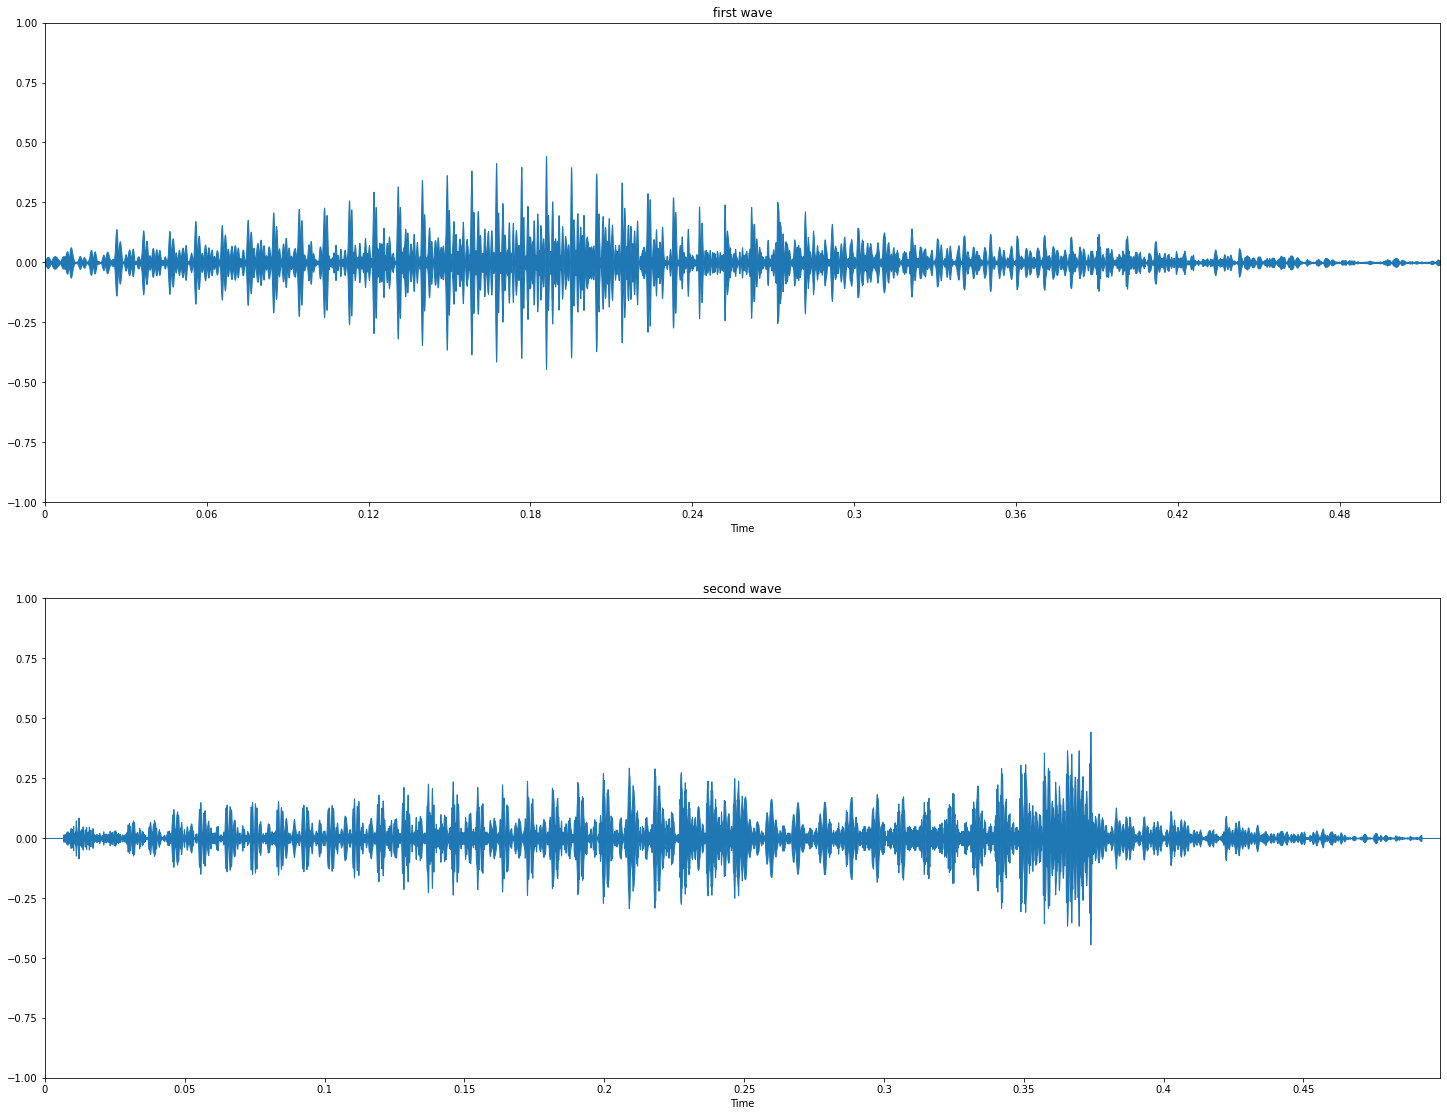

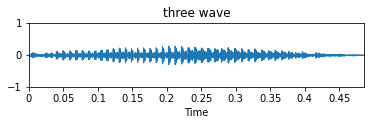

In [19]:
#visualization of data

plt.figure(figsize=(25,30))

plt.subplot(3,1,1)
librosa.display.waveplot(one)
plt.ylim(-1,1)
plt.title("first wave")

plt.subplot(3,1,2)
librosa.display.waveplot(two)
plt.ylim(-1,1)
plt.title("second wave")
plt.show()


plt.subplot(3,1,3)
librosa.display.waveplot(three)
plt.ylim(-1,1)
plt.title("three wave")
plt.show()

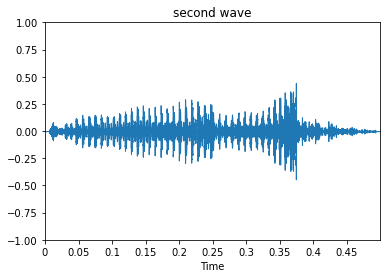

In [18]:
#plt.subplot(1,1)
librosa.display.waveplot(two)
plt.ylim(-1,1)
plt.title("second wave")
plt.show()
